In [2]:
#import libraries 
import math
import numpy
from matplotlib import pyplot 
%matplotlib inline

In [3]:
#establish grid - parameters given in problem statement 
N = 51 
x_start, x_end = -1.0, 2.0
y_start, y_end = -0.5, 0.5
x = numpy.linspace(x_start, x_end, N)
y = numpy.linspace(y_start, y_end, N)
X, Y = numpy.meshgrid(x, y)

In [4]:
#load data files- locations and strengths of sources/sinks
airfoil_x = numpy.loadtxt('NACA0012_x.txt')
airfoil_y = numpy.loadtxt('NACA0012_y.txt')
sigma = numpy.loadtxt('NACA0012_sigma.txt')
print(airfoil_x)
print(sigma)

[  9.99506682e-01   9.97535357e-01   9.93600488e-01   9.87717603e-01
   9.79909919e-01   9.70208251e-01   9.58650885e-01   9.45283433e-01
   9.30158651e-01   9.13336230e-01   8.94882559e-01   8.74870468e-01
   8.53378933e-01   8.30492774e-01   8.06302311e-01   7.80903012e-01
   7.54395117e-01   7.26883241e-01   6.98475961e-01   6.69285387e-01
   6.39426720e-01   6.09017800e-01   5.78178637e-01   5.47030938e-01
   5.15697630e-01   4.84302370e-01   4.52969062e-01   4.21821363e-01
   3.90982200e-01   3.60573280e-01   3.30714613e-01   3.01524039e-01
   2.73116759e-01   2.45604883e-01   2.19096988e-01   1.93697689e-01
   1.69507226e-01   1.46621067e-01   1.25129532e-01   1.05117441e-01
   8.66637700e-02   6.98413486e-02   5.47165669e-02   4.13491154e-02
   2.97917495e-02   2.00900806e-02   1.22823970e-02   6.39951199e-03
   2.46464256e-03   4.93317893e-04   4.93317893e-04   2.46464256e-03
   6.39951199e-03   1.22823970e-02   2.00900806e-02   2.97917495e-02
   4.13491154e-02   5.47165669e-02

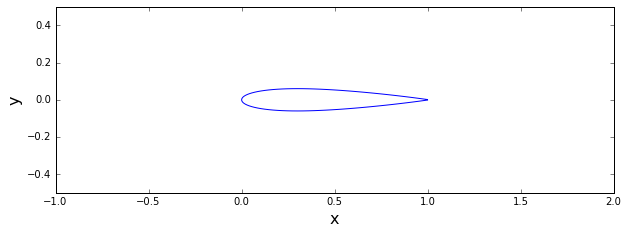

In [163]:
#plot airfoil
size = 10
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize = 16)
pyplot.ylabel('y', fontsize = 16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.plot(airfoil_x, airfoil_y)

In [164]:
def get_velocity(strength, xs, ys, X, Y):
    """
    Returns the velocity field generated by a source/sink
    strength: strength of the source/sink
    xs: x-coordinate of source/sink
    ys: y-coordinate of source/sink
    
    X: x-coordinate of the mesh points
    Y: y-coordinate of the mesh points
    
    u: x-component of the velocity vector field 
    v: y-component of the velocity vector field 
    """
    
    u = strength/(2*numpy.pi)*(X-xs)/((X-xs)**2 + (Y-ys)**2)
    v = strength/(2*numpy.pi)*(Y-ys)/((X-xs)**2 + (Y-ys)**2)
    
    return u,v

In [165]:
#velocities for sources
u_airfoil = numpy.zeros((N,N))
v_airfoil = numpy.zeros((N,N))

for i in range(0, len(sigma)):
    u, v = get_velocity(sigma[i], airfoil_x[i], airfoil_y[i], X, Y)
    u_airfoil += u
    v_airfoil += v

In [166]:
def get_stream_function(strength, xs, ys, X, Y):
    """
    Returns the stream function generated by a source 
    strength: strength of the source/sink
    xs: x-coordinate of source/sink
    ys: y-coordinate of source/sink
    
    X: x-coordinate of the mesh points
    Y: y-coordinate of the mesh points
    
    psi: stream function, 2D numpy array
    """
    psi = strength/(2*numpy.pi)*numpy.arctan2((Y-ys),(X-xs))
    
    return psi

In [167]:
#stream function for sources

psi_airfoil = numpy.zeros((N,N))
for i in range(0, len(sigma)):
    psi = get_stream_function(sigma[i], airfoil_x[i], airfoil_y[i], X, Y)
    psi_airfoil += psi

In [168]:
#freestream information

u_inf = 1.0
u_freestream = u_inf * numpy.ones((N,N), dtype = float)
v_freestream = numpy.zeros((N,N), dtype = float)
psi_freestream = u_inf * Y


In [169]:
#superposition

u = u_airfoil + u_freestream
v = v_airfoil + v_freestream
psi = psi_airfoil + psi_freestream

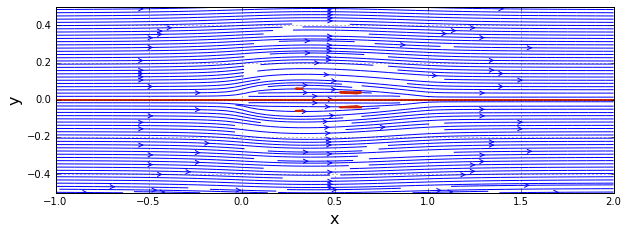

In [170]:
#plotting streamlines

size = 10
pyplot.figure(figsize=(size, (y_end - y_start)/(x_end - x_start) * size))
pyplot.grid(True)
pyplot.xlabel('x', fontsize = 16)
pyplot.ylabel('y', fontsize = 16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u, v, density = 2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.contour(X, Y, psi, levels=[0.], colors='#CD2305', linewidths=2, linestyles='solid');

The maximum pressure coefficient is: 0.4714436613316241
The minimum pressure coefficient is: -0.552370829671931
The array indices of the maximum pressure coeffient are: (25, 16)
The array indices of the minimum pressure coeffient are: (25, 17)


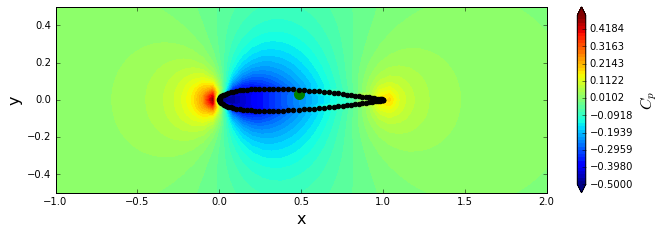

In [212]:
#calculate pressure coefficient, Cp

cp = 1.0 - (u**2+v**2)/u_inf**2

#maximum pressure coefficient

maxCp = numpy.max(cp)
print('The maximum pressure coefficient is: {}'.format(maxCp))

minCp = numpy.min(cp)
print('The minimum pressure coefficient is: {}'.format(minCp))

#find array indices of max pressure coefficient
loc_maxCp = numpy.argmax(cp)
maxCp_indices = numpy.unravel_index(loc_maxCp, cp.shape)
loc_minCp = numpy.argmin(cp)
minCp_indices = numpy.unravel_index(loc_minCp, cp.shape)

print('The array indices of the maximum pressure coeffient are: {}'.format(maxCp_indices))
print('The array indices of the minimum pressure coeffient are: {}'.format(minCp_indices))

max_CpX, max_CpY = maxCp_indices
min_CpX, min_CpY = minCp_indices

#pressure coefficient field 
size = 10
pyplot.figure(figsize=(1.1*size, (y_end - y_start)/(x_end - x_start)*size))
pyplot.xlabel('x', fontsize = 16)
pyplot.ylabel('y', fontsize = 16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
contf = pyplot.contourf(X, Y, cp, levels=numpy.linspace(-0.5, 0.5, 50), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize = 16)
pyplot.scatter(max_CpX2, max_CpY2, color='g', s=100, marker='o')
pyplot.scatter(airfoil_x, airfoil_y, marker='o', color='k')

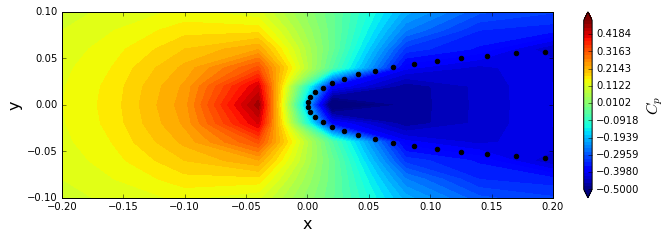

In [172]:
#zoomed in pressure field at leading edge 

#pressure coefficient field 
size = 10
pyplot.figure(figsize=(1.1*size, (y_end - y_start)/(x_end - x_start)*size))
pyplot.xlabel('x', fontsize = 16)
pyplot.ylabel('y', fontsize = 16)
pyplot.xlim(-0.2,0.2)
pyplot.ylim(-0.1,0.1)
contf = pyplot.contourf(X, Y, cp, levels=numpy.linspace(-0.5, 0.5, 50), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize = 16)
pyplot.scatter(airfoil_x, airfoil_y, marker='o', color='k')

The stagnation point appears offset from the airfoil- this is not physically accurate. In order to increase physical accuracy of this plot, we could refine the mesh by increasing our N value

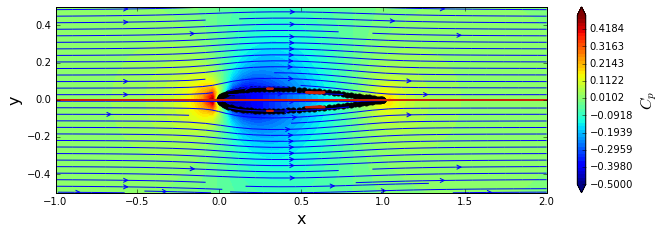

In [194]:
#streamlines, pressure map and profile of NACA0012 airfoil 
size = 10
pyplot.figure(figsize=(1.1*size, (y_end - y_start)/(x_end - x_start)*size))
pyplot.xlabel('x', fontsize = 16)
pyplot.ylabel('y', fontsize = 16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
contf = pyplot.contourf(X, Y, cp, levels=numpy.linspace(-0.5, 0.5, 50), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize = 16)
pyplot.scatter(airfoil_x, airfoil_y, marker='o', color='k', s=25)
pyplot.streamplot(X, Y, u, v, density = 1, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.contour(X, Y, psi, levels=[0.], colors='#CD2305', linewidths=2, linestyles='solid');


# Questions 

Do the stream lines look like you expected? 
Ans: Yes

What does the distribution of pressure tell you about lift generated by the airfoil? Ans: The pressure distribution shows that there is no lift 

Does the location of the point of maximum pressure seem right to you? Yes